**Market Risk Indicator**

In [37]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [38]:
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    # Handle NaN values for all columns
    data = data['Close'].ffill().bfill()  # Forward-fill NaNs, then backward-fill if needed
    return data

In [39]:
def calculate_mri(data, lookback):
    # Calculate daily returns
    daily_returns = data.pct_change().dropna()
    
    # Extract the comparison indices
    comparison_index = daily_returns[['^VIX', '^MOVE', 'EVZ']]
    
    # Calculate the offset values
    offset_values = {}
    for ticker in comparison_index.columns:
        offset_values[ticker] = -comparison_index[ticker].rolling(window=g4).sum()
    
    # Convert offset_values dict to DataFrame
    offset_values_df = pd.DataFrame(offset_values).dropna()
    
    # Weights (equal weights in this example)
    weights = np.array([1, 1, 1])
    
    # Calculate MRI value
    mri = offset_values_df.apply(lambda row: np.dot(row, weights), axis=1) / np.sqrt(g4)
    
    return mri

In [40]:
def plot_data(data, mri, gspc_ticker='^GSPC', start_date=None, end_date=None):
    # Filter data for the specified date range
    if start_date is not None and end_date is not None:
        data = data.loc[start_date:end_date]
        mri = mri.loc[start_date:end_date]
    
    plt.figure(figsize=(14, 7))
    
    # Plot MRI on the primary y-axis
    ax1 = plt.gca()
    ax1.plot(mri.index, mri, label='Keridion MRI', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('MRI', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create a secondary y-axis for the S&P 500 Index
    ax2 = ax1.twinx()
    ax2.plot(data.index, data[gspc_ticker], label='S&P500 Index', color='red')
    ax2.set_ylabel('S&P 500 Price', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Center MRI around 0 by setting y-axis limits
    mri_min, mri_max = mri.min(), mri.max()
    margin = (mri_max - mri_min) * 0.1  # 10% margin around min and max
    ax1.set_ylim(mri_min - margin, mri_max + margin)
    
    # Format x-axis to show labels every 2 months
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.title('MRI vs S&P500 Chart')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

[*********************100%%**********************]  5 of 5 completed


Ticker            AAPL   EVZ        ^GSPC      ^MOVE   ^VIX
Date                                                       
2024-07-17  228.880005  0.32  5588.270020  91.000000  14.48
2024-07-18  224.179993  0.32  5544.589844  91.970001  15.93
2024-07-19  224.309998  0.32  5505.000000  94.290001  16.52
2024-07-22  223.960007  0.32  5564.410156  94.449997  14.91
2024-07-23  225.009995  0.32  5555.740234  95.036400  14.72
Date
2024-07-17   -0.049163
2024-07-18   -0.112151
2024-07-19   -0.170281
2024-07-22   -0.064039
2024-07-23   -0.061712
dtype: float64


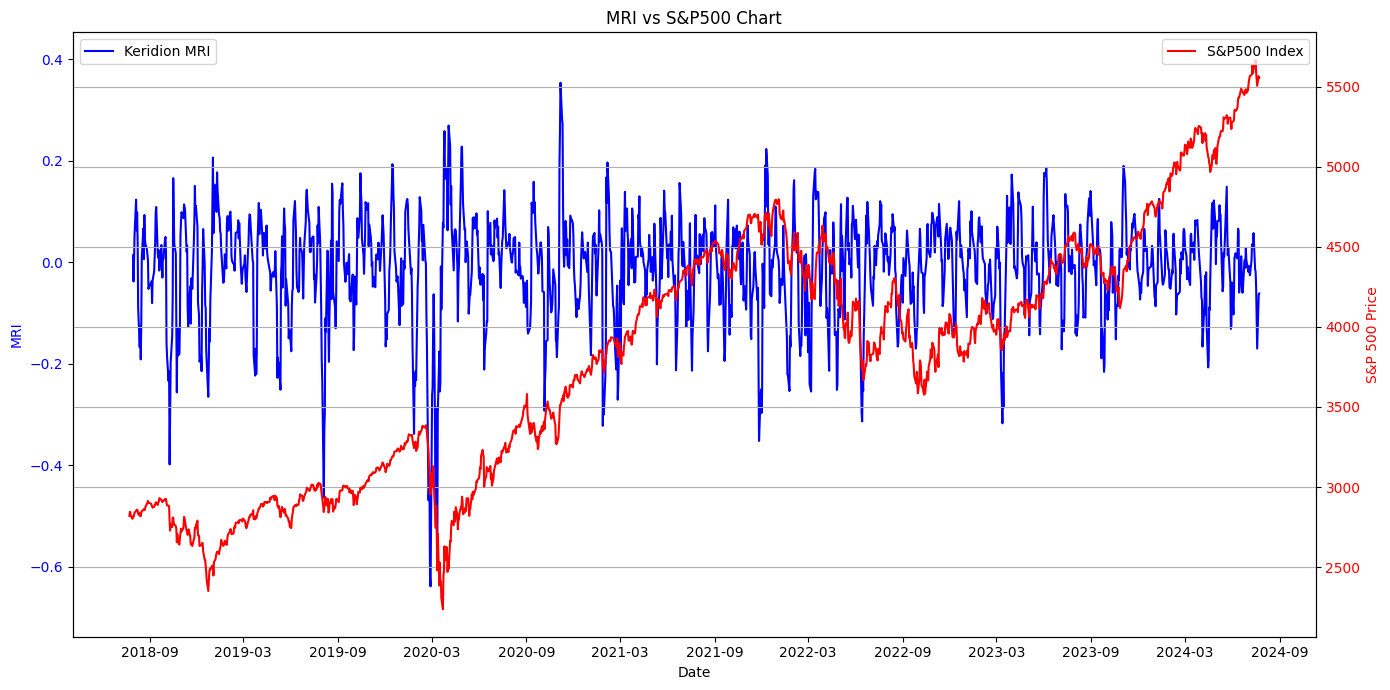

In [41]:
# Predefined tickers
tickers = ['^VIX', '^MOVE', 'EVZ', '^GSPC']
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.datetime.now() - pd.DateOffset(years=6)).strftime('%Y-%m-%d')

# Take additional stock ticker from user
user_ticker = input("Enter the ticker symbol of a stock you want to add: ")
tickers.append(user_ticker.upper())

data = get_data(tickers, start_date, end_date)
print(data.tail())

# Define G4 (number of rows for rolling calculation)
lookback = int(input("Enter the lookback period in days: "))

data_mri = calculate_mri(data, lookback)
print(data_mri.tail())

# Plotting the data daily with x-axis labels every 2 months
plot_data(data, data_mri, gspc_ticker='^GSPC', start_date=start_date, end_date=end_date)